#Morphological convex hull operator (boundary and no boundary versions)
Zeynep Türkmen - 29541

###Importing the image & necessary libraries

In [44]:
#retrieve the cat image
!wget --no-check-certificate https://drive.google.com/uc?id=11_RnC5VGw74ZOFHAvosst-zo_c4UNh8_ -O perfectly_painted_cat.png

--2023-11-10 09:28:36--  https://drive.google.com/uc?id=11_RnC5VGw74ZOFHAvosst-zo_c4UNh8_
Resolving drive.google.com (drive.google.com)... 173.194.218.113, 173.194.218.101, 173.194.218.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.218.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0s-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ak2kdvltmi2okjl071kgvht6crk34120/1699608450000/00356598981331114075/*/11_RnC5VGw74ZOFHAvosst-zo_c4UNh8_?uuid=6880b4fe-4319-4d58-a465-a607e29c6372 [following]
--2023-11-10 09:28:36--  https://doc-0s-ao-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ak2kdvltmi2okjl071kgvht6crk34120/1699608450000/00356598981331114075/*/11_RnC5VGw74ZOFHAvosst-zo_c4UNh8_?uuid=6880b4fe-4319-4d58-a465-a607e29c6372
Resolving doc-0s-ao-docs.googleusercontent.com (doc-0s-ao-docs.googleusercontent.com)... 108.177.12.132, 2607:f8b0:400c:c08::84
Connecting to do

In [45]:
#import the libraries
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
%matplotlib inline
from matplotlib import pyplot as plt
import pylab

In [46]:
#displaying the image properties
input=cv2.imread('perfectly_painted_cat.png',cv2.IMREAD_GRAYSCALE)
height, width = input.shape
print("height=", height, "px, and width=", width, "px and type:", input.dtype)

height= 400 px, and width= 400 px and type: uint8


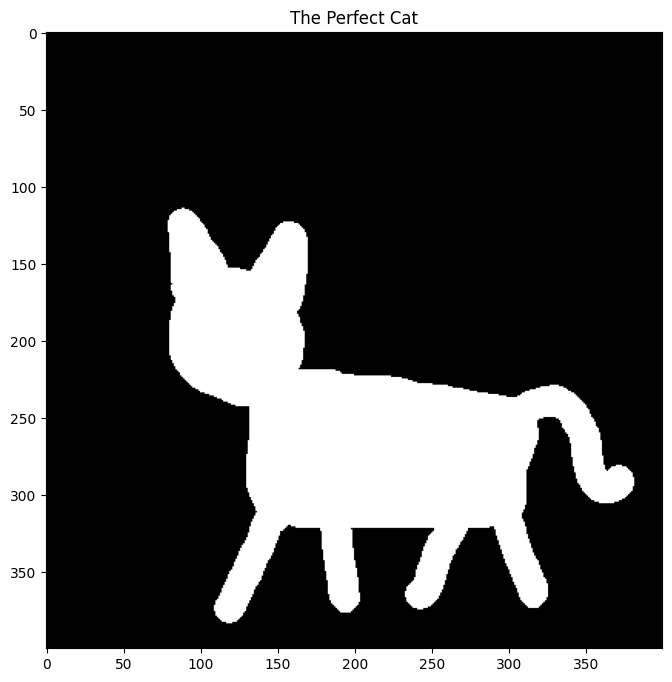

In [47]:
# displaying the image before the operations
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # adjust figure sizes
plt.title("The Perfect Cat")
plt.imshow(input, cmap='gray')

###Setting up the input and boundaries

In [48]:
#Create a padding around the image that is 2px thich around the image in order to always fit the 3x3 patch I will iterate over the image
padded = np.zeros((input.shape[0] + 4, input.shape[1] + 4))

padded[:2, :] = 0  #top
padded[-2:, :] = 0  #bottom
padded[:, :2] = 0  #left
padded[:, -2:] = 0  #right
padded[2:-2, 2:-2] = input #the original data

In [49]:
diff = np.zeros((height+4, width+4), dtype=np.uint8) #just to view the difference as a test

In [50]:
#set the minimum and maximum filled pixels to not exceed the limits of the image aka make the convex hull a little better, more 'contained'

#initial set of indexes
row_begin = height - 1 + 4 #as its an index but there is padding
row_end = 0
col_begin = width - 1 + 4
col_end = 0

#find the edge filled pixels for the convex operation
for i in range(height + 4):
    for j in range(width + 4):
      if (padded[i][j] == 255): #its a filled pixel
        row_begin = min(row_begin, i)
        row_end = max(row_end, i)
        col_begin =  min(col_begin, j)
        col_end = max(col_end, j)

print("row_begin =", row_begin)
print("row_end =", row_end)
print("col_begin =", col_begin)
print("col_end =", col_end)

row_begin = 116
row_end = 385
col_begin = 81
col_end = 383


###The convex hull operation with boundary

In [51]:
#the operations will be performed seperately and will be merged at the end
result_right = np.copy(padded) #the result will be a modification of the input image
result_left = np.copy(padded)
result_top = np.copy(padded)
result_bottom = np.copy(padded)

In [52]:
#call this function to check for each expansion mask. I will call it 4 times to create expansions for left right top and bottom
#The borders I set will make it so that the algorithm will not place new pixels exceeding the originally filled ones, meaning it will create a more contained convex hull
def convex_hull_side(x, y, z, t, theMatrix):
  change = True
  while(change == True):
    # Loop through each pixel of the image except the corners & sides
    change = False

    for i in range(row_begin - 1, row_end): #its adding the new squares to i+1 hence the latest addition will be at the border.
      for j in range(col_begin - 1, col_end):

        # Extracting the 3x3 patch from the updated image
        patch = theMatrix[i:i + 3, j:j + 3]

        # Checking if the patch matches the mask
        if (theMatrix[i+1][j+1] != 255 and np.all(patch[x:y, z:t] == 255)): #ok we found a matching patch now update the center pixel?
          # Updating the corresponding pixel in the result image
          theMatrix[i+1][j+1] = 255
          diff[i+1][j+1] = 255
          change = True #there is a change, repeat the process

#### Expansion Operations

In [53]:
#Call it on the LHS column of the patch in order to create an expansion to the right
#Simply put: If all 3 pixels on the lhs of the current iteration is filled, the center index will be filled
convex_hull_side(0,3,0,1, result_right)

#Call it on the rhs column of the patch in order to create an expansion to the left
#Simply put: If all 3 pixels on the rhs of the current iteration is filled, the center index will be filled
convex_hull_side(0,3,2,3, result_left)

#Call it on the top row of the patch in order to create an expansion to the bottom
#Simply put: If all 3 pixels on the top row of the current iteration is filled, the center index will be filled
convex_hull_side(0,1,0,3, result_bottom)

#Call it on the bottom row of the patch in order to create an expansion to the top
#Simply put: If all 3 pixels on the bottom row of the current iteration is filled, the center index will be filled
convex_hull_side(2,3,0,3, result_top)

#### Displaying the expansions seperatly

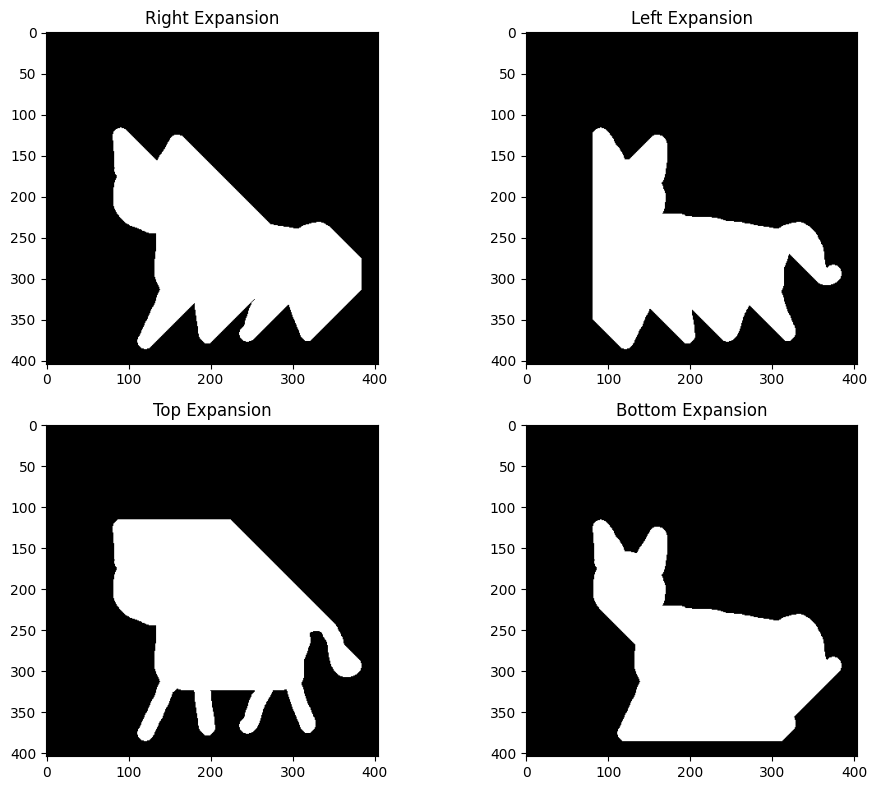

In [54]:
plt.subplot(2, 2, 1)
plt.imshow(result_right, cmap='gray')
plt.title('Right Expansion')

plt.subplot(2, 2, 2)
plt.imshow(result_left, cmap='gray')
plt.title('Left Expansion')

plt.subplot(2, 2, 3)
plt.imshow(result_top, cmap='gray')
plt.title('Top Expansion')

plt.subplot(2, 2, 4)
plt.imshow(result_bottom, cmap='gray')
plt.title('Bottom Expansion')

plt.tight_layout()

#Display them as a grid
plt.show()

#### Combining the results, displaying the final convex

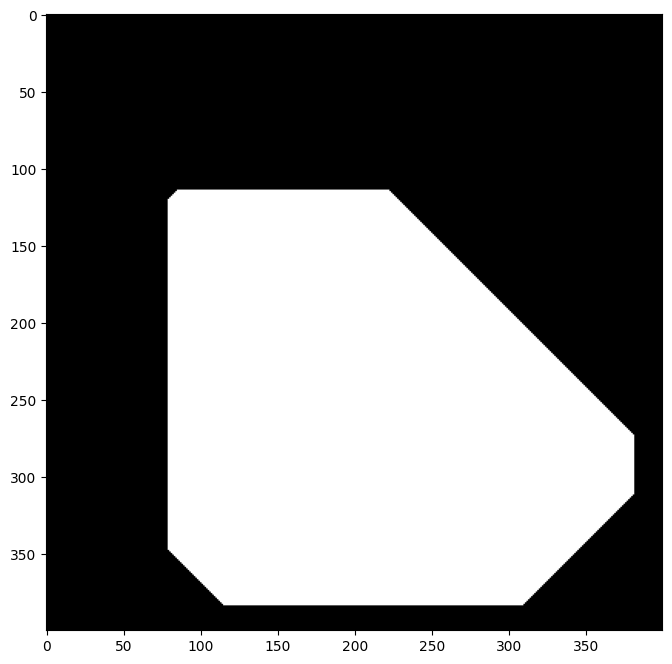

In [55]:
merged_result = np.maximum.reduce([result_right, result_left, result_top, result_bottom]) #take the union of 4 operations,
merged_result = merged_result[2:-2, 2:-2] #remove the added 2 pixel frame
plt.imshow(merged_result, cmap='gray') #display the final result

#### Displaying only the added pixels as a test

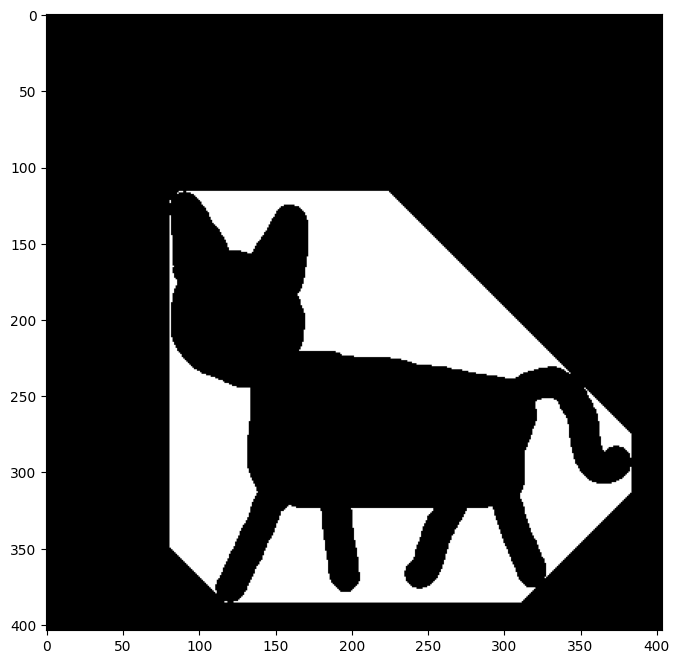

In [56]:
#display the difference as a test aka the pixels added by the convex hull operator
plt.imshow(diff, cmap='gray')

###The convex hull operation with no boundary

In [57]:
result2_right = np.copy(padded) #the result is a modification of the input image
result2_left = np.copy(padded)
result2_top = np.copy(padded)
result2_bottom = np.copy(padded)

diff2 = np.zeros((height+4, width+4), dtype=np.uint8) #just to view the difference as a test

In [58]:
#call this function to check for each expansion mask.
#This time it will allow placing pixels exceeding the filled pixels of the original image

def convex_hull_no_border(x, y, z, t, theMatrix):
  change = True
  while(change == True):
    # Loop through each pixel of the image except the corners & sides
    change = False

    for i in range(height + 1): #last addition will be at the border, but I have padding!!!
      for j in range(width + 1):

        # Extracting the 3x3 patch from the updated image
        patch = theMatrix[i:i + 3, j:j + 3]

        # Checking if the patch matches the mask
        if (theMatrix[i+1][j+1] != 255 and np.all(patch[x:y, z:t] == 255)): #ok we found a matching patch now update the center pixel?
          # Updating the corresponding pixel in the result image
          theMatrix[i+1][j+1] = 255
          diff2[i+1][j+1] = 255
          change = True #there is a change, repeat the process

#### Calling the expansion operations

In [59]:
#call for all 4 expansions
convex_hull_no_border(0,3,0,1, result2_right)
convex_hull_no_border(0,3,2,3, result2_left)
convex_hull_no_border(0,1,0,3, result2_bottom)
convex_hull_no_border(2,3,0,3, result2_top)

#### Displaying the expansions seperatly

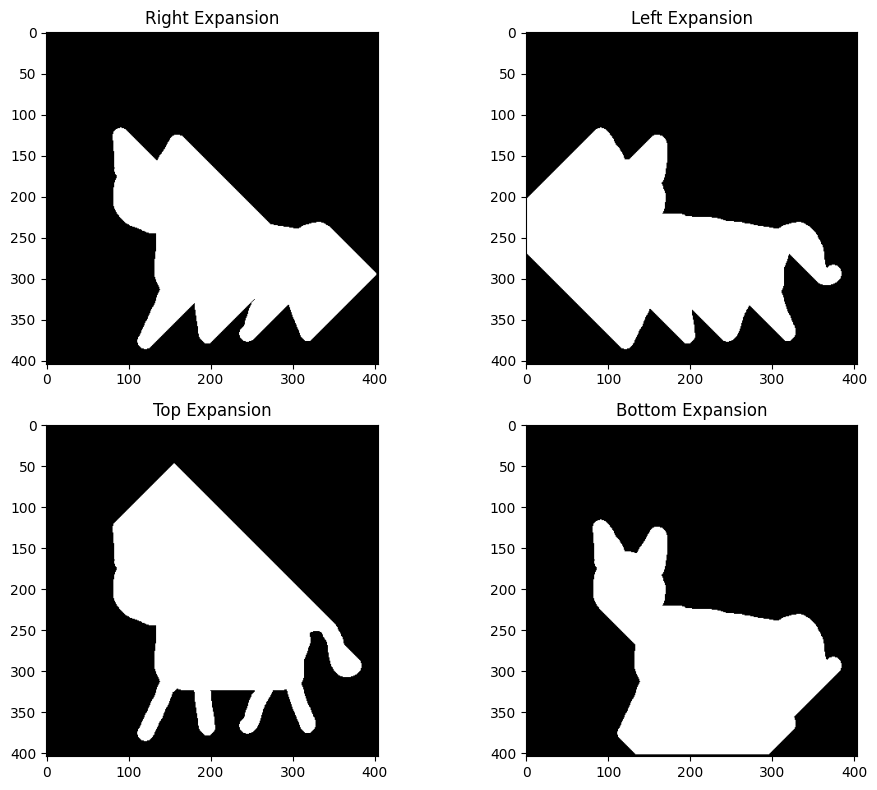

In [60]:
plt.subplot(2, 2, 1)
plt.imshow(result2_right, cmap='gray')
plt.title('Right Expansion')

plt.subplot(2, 2, 2)
plt.imshow(result2_left, cmap='gray')
plt.title('Left Expansion')

plt.subplot(2, 2, 3)
plt.imshow(result2_top, cmap='gray')
plt.title('Top Expansion')

plt.subplot(2, 2, 4)
plt.imshow(result2_bottom, cmap='gray')
plt.title('Bottom Expansion')

plt.tight_layout()

#Display them as a grid
plt.show()

#### Combining the results, displaying the final convex

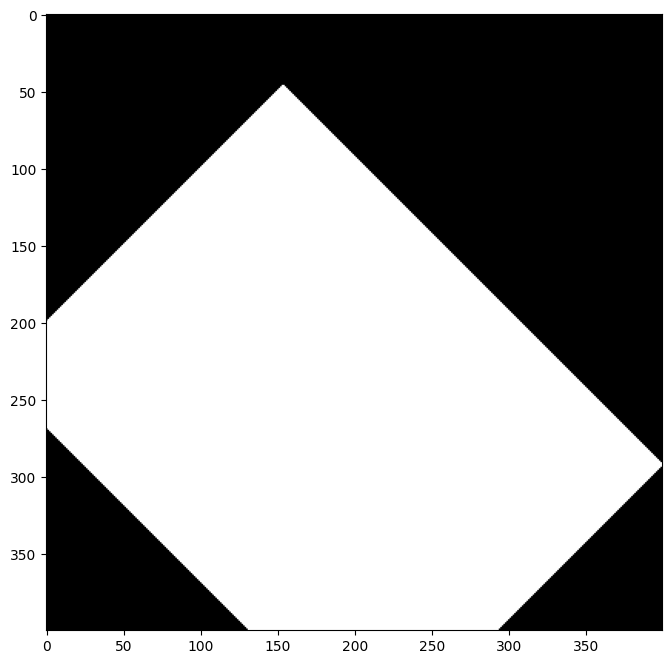

In [61]:
#merge the results and remove the padding
merged_result2 = np.maximum.reduce([result2_right, result2_left, result2_top, result2_bottom]) #take the union of 4 operations
merged_result2 = merged_result2[2:-2, 2:-2] #remove the added 2 pixel frame

#display the results
plt.imshow(merged_result2, cmap='gray') #display the final result

#### Displaying only the added pixels as a test

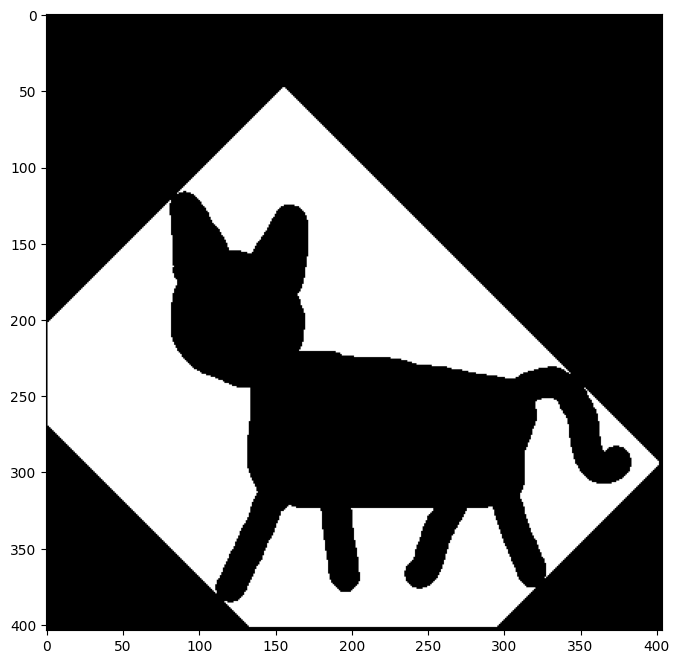

In [62]:
#display the difference
plt.imshow(diff2, cmap='gray')

###Comparing 2 versions

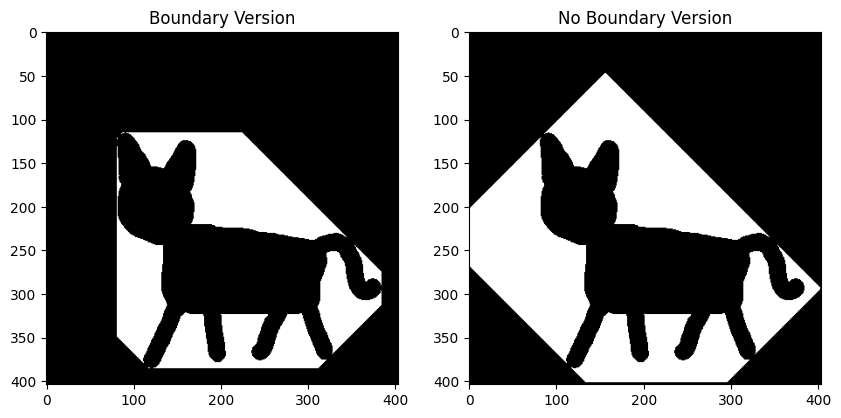

In [63]:
#The difference of the added pixels
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(diff, cmap='gray')
plt.title('Boundary Version')

plt.subplot(1, 2, 2)
plt.imshow(diff2, cmap='gray')
plt.title('No Boundary Version')

plt.show()

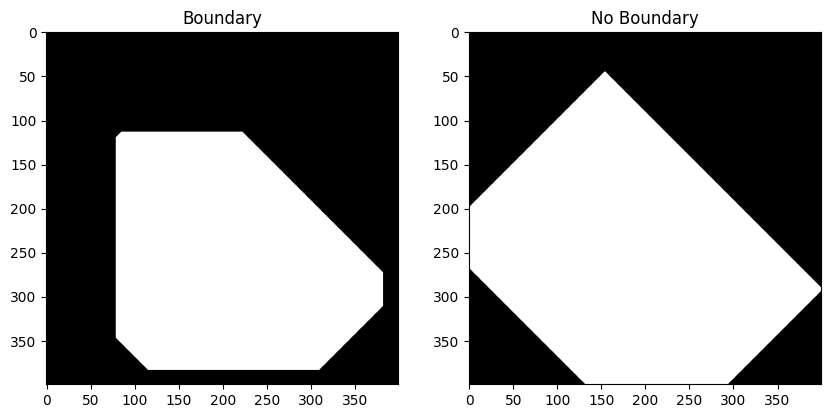

In [64]:
#Comparing the FINAL results...
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(merged_result, cmap='gray')
plt.title('Boundary')

plt.subplot(1, 2, 2)
plt.imshow(merged_result2, cmap='gray')
plt.title('No Boundary')

plt.show()